In [13]:
import sys
import os

In [14]:
from nunet.nn.mlp import MLP
from nunet.optim import SGD
from nunet.loss import MSELoss
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [15]:
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=45)
y = y.reshape(-1, 1) 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

In [18]:
model = MLP(
    input_dim=10,
    hidden_dims=[16, 8],
    output_dim=1,
    init_method='normal',
    activation='relu'
)

In [19]:
optimizer = SGD(model.param, lr=0.01)
loss_fn = MSELoss()

In [20]:
num_epochs = 1000
batch_size = 64

In [21]:
train_losses, val_losses = model.fit(
    X_train, y_train,
    loss_fn=loss_fn,
    optimizer_fn=optimizer,
    X_val=X_test,
    y_val=y_test,
    batch_size=batch_size,
    epochs=num_epochs
)

Epoch [1/1000] - train_loss: 1.0129 - val_loss: 1.2349
Epoch [2/1000] - train_loss: 0.9839 - val_loss: 1.2339
Epoch [3/1000] - train_loss: 1.0073 - val_loss: 1.2326
Epoch [4/1000] - train_loss: 1.0031 - val_loss: 1.2313
Epoch [5/1000] - train_loss: 0.9958 - val_loss: 1.2298
Epoch [6/1000] - train_loss: 0.9867 - val_loss: 1.2282
Epoch [7/1000] - train_loss: 0.9938 - val_loss: 1.2261
Epoch [8/1000] - train_loss: 0.9871 - val_loss: 1.2238
Epoch [9/1000] - train_loss: 0.9926 - val_loss: 1.2212
Epoch [10/1000] - train_loss: 0.9966 - val_loss: 1.2182
Epoch [11/1000] - train_loss: 1.0052 - val_loss: 1.2150
Epoch [12/1000] - train_loss: 0.9896 - val_loss: 1.2116
Epoch [13/1000] - train_loss: 0.9815 - val_loss: 1.2077
Epoch [14/1000] - train_loss: 0.9892 - val_loss: 1.2034
Epoch [15/1000] - train_loss: 0.9872 - val_loss: 1.1983
Epoch [16/1000] - train_loss: 0.9563 - val_loss: 1.1926
Epoch [17/1000] - train_loss: 0.9591 - val_loss: 1.1860
Epoch [18/1000] - train_loss: 0.9492 - val_loss: 1.1781
E

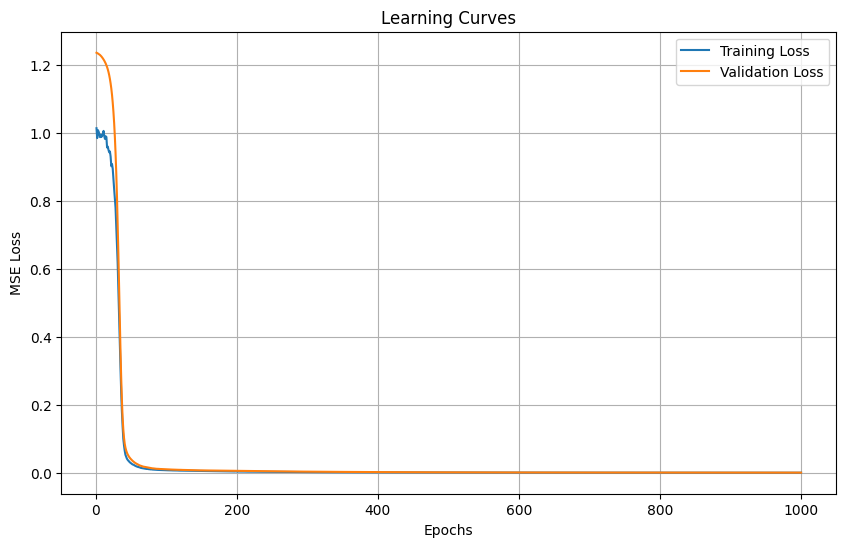

In [22]:
# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Make predictions on test data
y_pred = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)  # Transform back to original scale
y_test_orig = y_scaler.inverse_transform(y_test)  # Transform test data back

# Calculate R^2 score
mean_y = np.mean(y_test_orig)
ss_tot = np.sum((y_test_orig - mean_y) ** 2)
ss_res = np.sum((y_test_orig - y_pred) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print(f"Final validation loss (MSE): {val_losses[-1]:.4f}")
print(f"R² Score: {r2_score:.4f}")

Final validation loss (MSE): 0.0005
R² Score: 0.9995


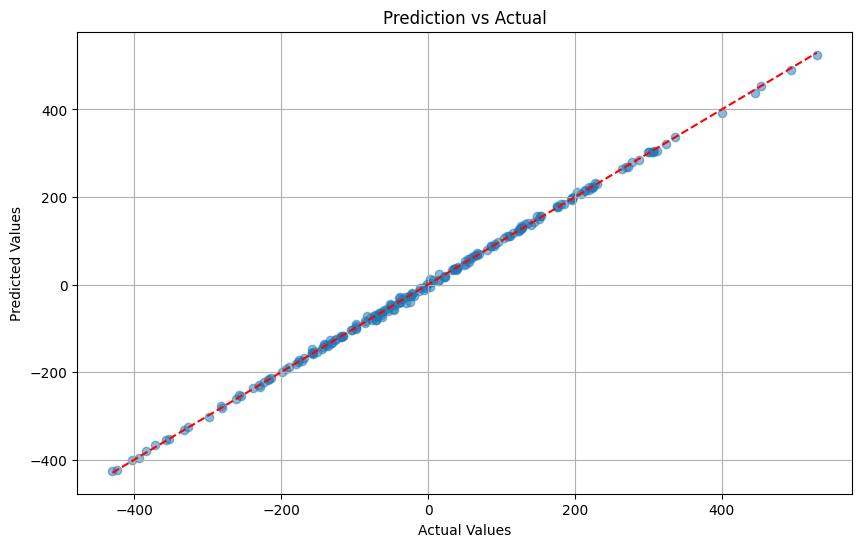

In [24]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual')
plt.grid(True)
plt.show()